# 🎸 The Main Performance: Clustering Analysis

Now for the main event. In this notebook, we use Spotify's data to uncover hidden patterns within the Rolling Stones' diverse catalog. Through clustering analysis, we'll group songs that share similar characteristics according to Spotify's audio features, potentially revealing different facets of the band's musical identity as represented on the platform.

These clusters might align with different eras of the band's evolution, various stylistic experiments, or recurring themes in their work. This analysis will provide a deeper understanding of how the band's music is organized and potentially recommended within Spotify's ecosystem.

By identifying these patterns, we'll gain insight into how Spotify might view the diversity of the Rolling Stones' catalog, which could inform how the platform introduces different aspects of their music to listeners.

In [1]:
# Run helper functions
%run "./helper_functions.ipynb"

# Load the enriched dataset
stones_tracks_enriched = load_processed_csv_data('stones_tracks_enriched.csv')

# Display basic information about our dataset
print("Dataset Information:")
print(f"Stones Tracks Enriched: {stones_tracks_enriched.shape[0]} rows, {stones_tracks_enriched.shape[1]} columns")

# Display the first few rows of the stones_tracks_enriched dataset
print("\nFirst few rows of stones_tracks_enriched:")
display(stones_tracks_enriched.head())

# Display summary statistics of our engineered features
print("\nSummary statistics of engineered features:")
display(stones_tracks_enriched[['groovy_factor', 'raw_energy']].describe())

Dataset Information:
Stones Tracks Enriched: 1508 rows, 7 columns

First few rows of stones_tracks_enriched:


,id,name,album,release_date,popularity,groovy_factor,raw_energy
0,63T7DJ1AFDD6Bn8VzG6JE8,"Paint It, Black",Aftermath,1966-04-15,80,0.283968,0.268213
1,6H3kDe7CGoWYBabAeVWGiD,Gimme Shelter,Let It Bleed,1969-12-05,76,0.310026,0.092326
2,2PzU4IB8Dr6mxV3lHuaG34,(I Can't Get No) Satisfaction - Mono Version,Out Of Our Heads,1965-07-30,76,0.673113,0.095938
3,7HKez549fwJQDzx3zLjHKC,Start Me Up - Remastered 2009,Tattoo You (2009 Re-Mastered),1981-08-24,76,0.612701,0.079651
4,1Ud6moTC0KyXMq1Oxfien0,Sympathy For The Devil - 50th Anniversary Edition,Beggars Banquet (50th Anniversary Edition),1968-12-06,73,0.393822,0.033231



Summary statistics of engineered features:


,groovy_factor,raw_energy
count,1508.000000,1508.000000
mean,0.289542,0.383569
std,0.172492,0.310281
min,0.000000,0.010121
25%,0.143732,0.085382
50%,0.260986,0.278448
75%,0.416718,0.707482
max,0.804105,0.946945


## 🎸 Tuning in to the Perfect Harmony: Finding Our Ideal Number of Clusters

As we prepare to group the Rolling Stones' tracks into cohorts, we face a crucial decision: how many distinct "sounds" or "eras" can we identify in their vast catalog? It's like trying to organize a massive record collection - too few categories and we lose nuance (that's underfitting, in data science speak), too many and we overcomplicate things, mistaking noise for signal (overfitting).

To strike the right chord and avoid these pitfalls, we're calling on two musical mathematicians: the Elbow Method and Silhouette Analysis. Think of the Elbow Method as our sound engineer, adjusting the levels until he finds that sweet spot where adding more doesn't improve the mix. Silhouette Analysis, meanwhile, is our seasoned rock critic, measuring how well each song fits into its assigned playlist.

By harmonizing these two methods, we're aiming to find the optimal number of clusters - or as we might call them, the "Greatest Hits" of Rolling Stones song categories. Let's drop the needle on this analysis and see what patterns emerge in the grooves of our data vinyl! 🎵📊

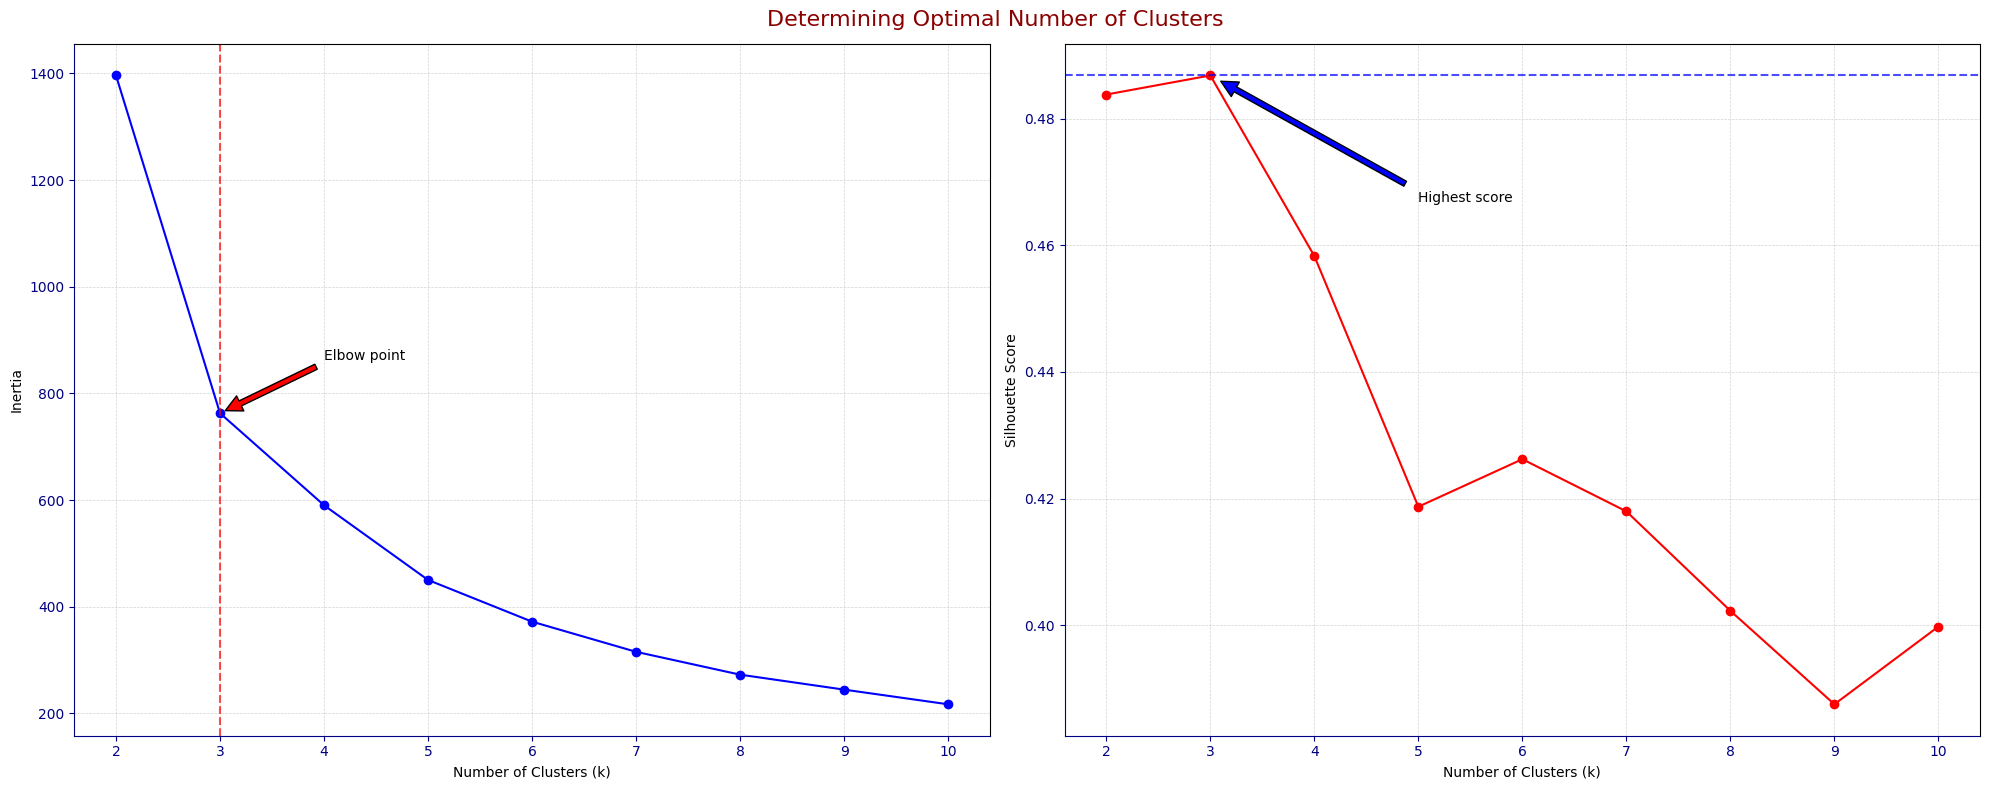

In [2]:
# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(stones_tracks_enriched[['groovy_factor', 'raw_energy']])

# Elbow method and Silhouette analysis
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_features, kmeans.labels_))

# Create side-by-side plots for Elbow Method and Silhouette Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=FIGURE_SIZES['wide'])

# Elbow Method plot
ax1.plot(K, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
# Add vertical line at k=3
ax1.axvline(x=3, color='red', linestyle='--', alpha=0.7)
# Add annotation
ax1.annotate('Elbow point', xy=(3, inertias[1]), xytext=(4, inertias[1]+100),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Silhouette Analysis plot
ax2.plot(K, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis for Optimal k')
# Add horizontal line at the maximum silhouette score
max_score = max(silhouette_scores)
ax2.axhline(y=max_score, color='blue', linestyle='--', alpha=0.7)
# Add annotation
ax2.annotate('Highest score', xy=(3, max_score), xytext=(5, max_score-0.02),
             arrowprops=dict(facecolor='blue', shrink=0.05))

# Apply custom styling to the entire figure
apply_stones_style(fig, ax1, '')
apply_stones_style(fig, ax2, '')

# Set an overall title for the figure
fig.suptitle('Determining Optimal Number of Clusters', fontsize=16, color=PLOT_STYLES['title_color'])
plt.tight_layout()
plt.show()

### 🎵 Insight: Determining the Optimal Number of Clusters

After analyzing both the Elbow Method and Silhouette Analysis plots, with key points visually highlighted:

1. **Elbow Method**: The plot shows a significant "elbow" at k=3, marked by a vertical red dashed line. This point, annotated as the "Elbow point", indicates where the rate of inertia decrease starts to level off. It's like finding the sweet spot in a guitar's distortion - beyond this point, adding more doesn't improve the sound much.

2. **Silhouette Analysis**: The highest silhouette score is clearly at k=3, emphasized by a horizontal blue dashed line. This peak, labeled "Highest score", suggests that a 3-cluster solution provides the best separation between clusters. It's akin to finding the perfect mix balance where each instrument is distinctly heard.

Both methods are in perfect harmony, pointing to **3 clusters** as the optimal choice for our K-means analysis. This alignment gives us confidence in our decision, striking a balance between model simplicity and explanatory power.

Choosing 3 clusters helps us avoid the pitfalls of underfitting (which might occur with just 2 clusters, like trying to categorize all Stones songs as either "rock" or "blues") and overfitting (which we might risk with 4 or more clusters, like creating a separate category for every album). It's like finding the perfect three-chord progression in a Stones classic - complex enough to capture the essence, but not so intricate that we lose the groove.

As we move forward with this 3-cluster solution, we should keep in mind that while statistically optimal, the real test will be in the interpretation. Do these three clusters provide meaningful insights into the Rolling Stones' musical journey? Will they help us understand the band's evolution from British blues to global rock icons?

Let's roll with these 3 clusters and see what story they tell about the Stones' six decades of rock 'n' roll! Will we uncover distinct eras in their sound, or perhaps different facets of their musical personality? Time to let the data sing and reveal the hidden patterns in the Stones' legendary catalog! 🎸🔍🎵

Cluster Characteristics:


,groovy_factor,raw_energy,popularity
cluster,,,
0,0.499989,0.169669,23.572340
1,0.183219,0.739435,18.450607
2,0.208062,0.156233,23.314534


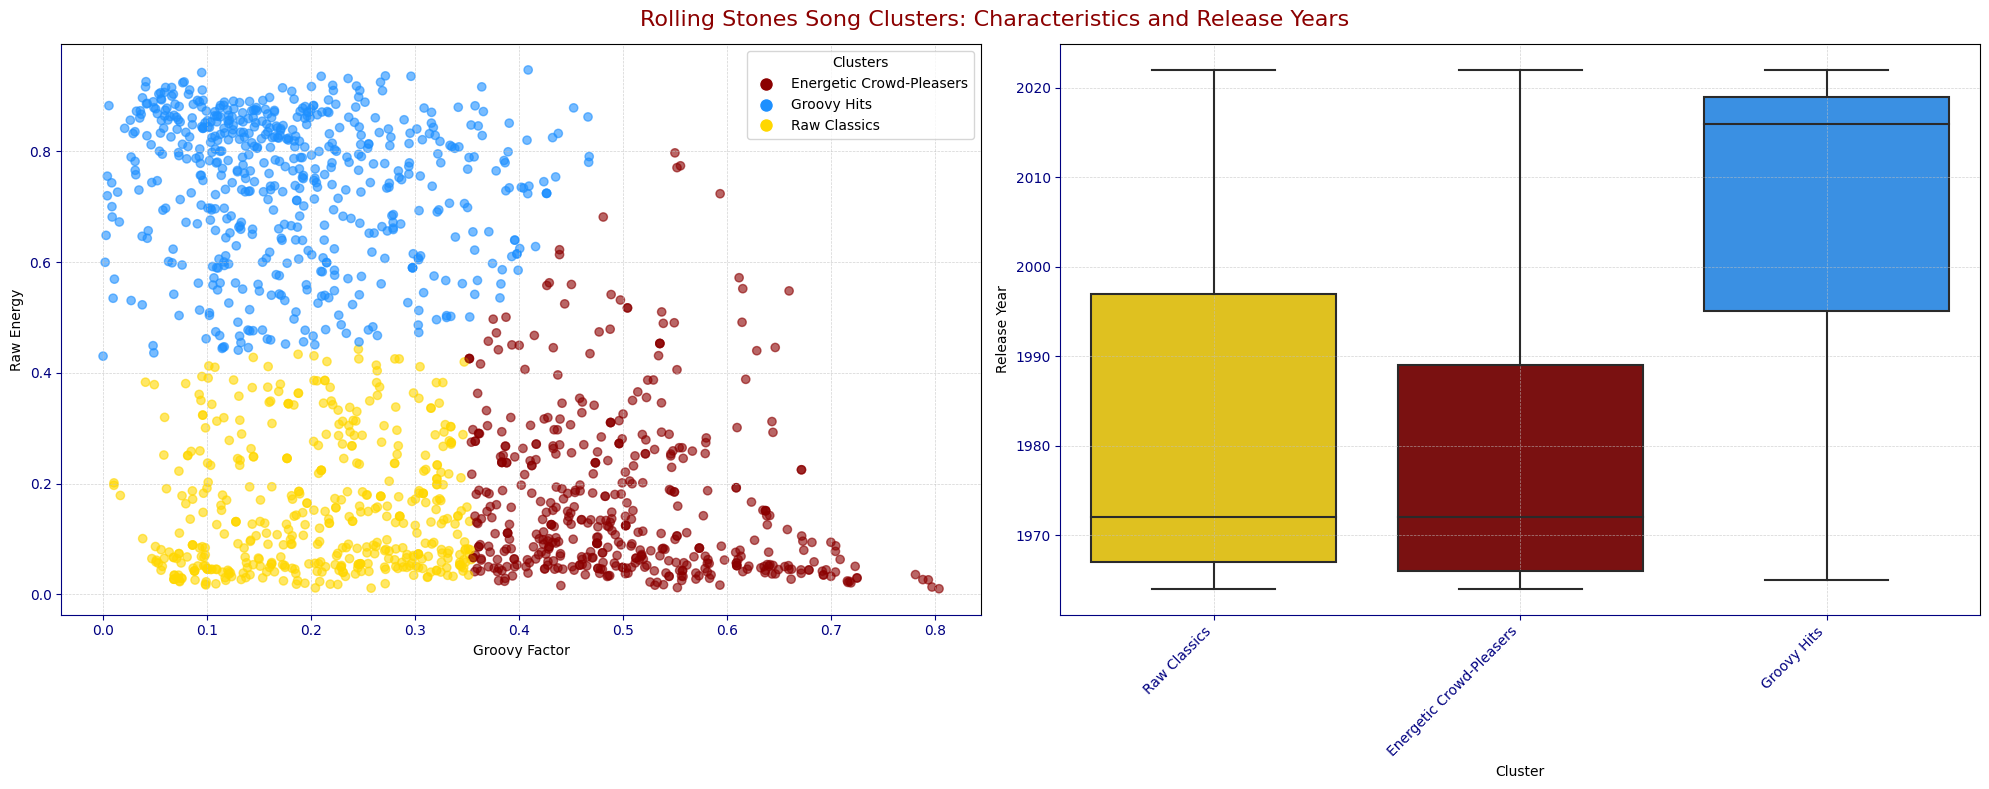


Detailed Cluster Characteristics:

Energetic Crowd-Pleasers
       groovy_factor  raw_energy  popularity
count     470.000000  470.000000  470.000000
mean        0.499989    0.169669   23.572340
std         0.098551    0.148874   14.443408
min         0.352304    0.010121    0.000000
25%         0.426558    0.056332   15.000000
50%         0.487567    0.112357   23.000000
75%         0.556567    0.252855   32.000000
max         0.804105    0.797186   76.000000

Groovy Hits
       groovy_factor  raw_energy  popularity
count     577.000000  577.000000  577.000000
mean        0.183219    0.739435   18.450607
std         0.103309    0.131641    7.797218
min         0.000000    0.430104    0.000000
25%         0.108116    0.643023   14.000000
50%         0.166552    0.777288   18.000000
75%         0.247032    0.847516   23.000000
max         0.467610    0.946945   50.000000

Raw Classics
       groovy_factor  raw_energy  popularity
count     461.000000  461.000000  461.000000
mean        

In [3]:
# Implement K-means with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_features)

# Add cluster labels to the dataframe
stones_tracks_enriched['cluster'] = cluster_labels

# Define cluster colors and names
cluster_colors = [STONES_PALETTE['dark_red'], STONES_PALETTE['blue'], STONES_PALETTE['yellow']]
cluster_names = {
    0: "Energetic Crowd-Pleasers",
    1: "Groovy Hits",
    2: "Raw Classics"
}

stones_tracks_enriched['cluster_name'] = stones_tracks_enriched['cluster'].map(cluster_names)

# Create a color map for consistent coloring
color_map = {name: color for name, color in zip(cluster_names.values(), cluster_colors)}

# Analyze cluster characteristics
cluster_characteristics = stones_tracks_enriched.groupby('cluster')[['groovy_factor', 'raw_energy', 'popularity']].mean()
print("Cluster Characteristics:")
display(cluster_characteristics)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=FIGURE_SIZES['wide'])

# Visualize clusters
scatter = ax1.scatter(stones_tracks_enriched['groovy_factor'], 
                      stones_tracks_enriched['raw_energy'], 
                      c=stones_tracks_enriched['cluster'].map({0: cluster_colors[0], 1: cluster_colors[1], 2: cluster_colors[2]}),
                      alpha=0.6)
ax1.set_xlabel('Groovy Factor')
ax1.set_ylabel('Raw Energy')
ax1.set_title('Clusters of Rolling Stones Songs')

# Add a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=name, 
                   markerfacecolor=color, markersize=10) 
                   for name, color in color_map.items()]
ax1.legend(handles=legend_elements, title="Clusters")

# Analyze distribution of release years within clusters
stones_tracks_enriched['release_year'] = pd.to_datetime(stones_tracks_enriched['release_date']).dt.year
sns.boxplot(x='cluster_name', y='release_year', data=stones_tracks_enriched, ax=ax2, palette=color_map)
ax2.set_title('Distribution of Release Years by Cluster')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Release Year')

# Rotate x-axis labels for better readability
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Apply custom styling to both plots
apply_stones_style(fig, ax1, '')
apply_stones_style(fig, ax2, '')

# Set an overall title for the figure
fig.suptitle('Rolling Stones Song Clusters: Characteristics and Release Years', fontsize=16, color=PLOT_STYLES['title_color'])

plt.tight_layout()
plt.show()

# Print detailed cluster characteristics
print("\nDetailed Cluster Characteristics:")
for cluster, name in cluster_names.items():
    print(f"\n{name}")
    print(stones_tracks_enriched[stones_tracks_enriched['cluster'] == cluster][['groovy_factor', 'raw_energy', 'popularity']].describe())

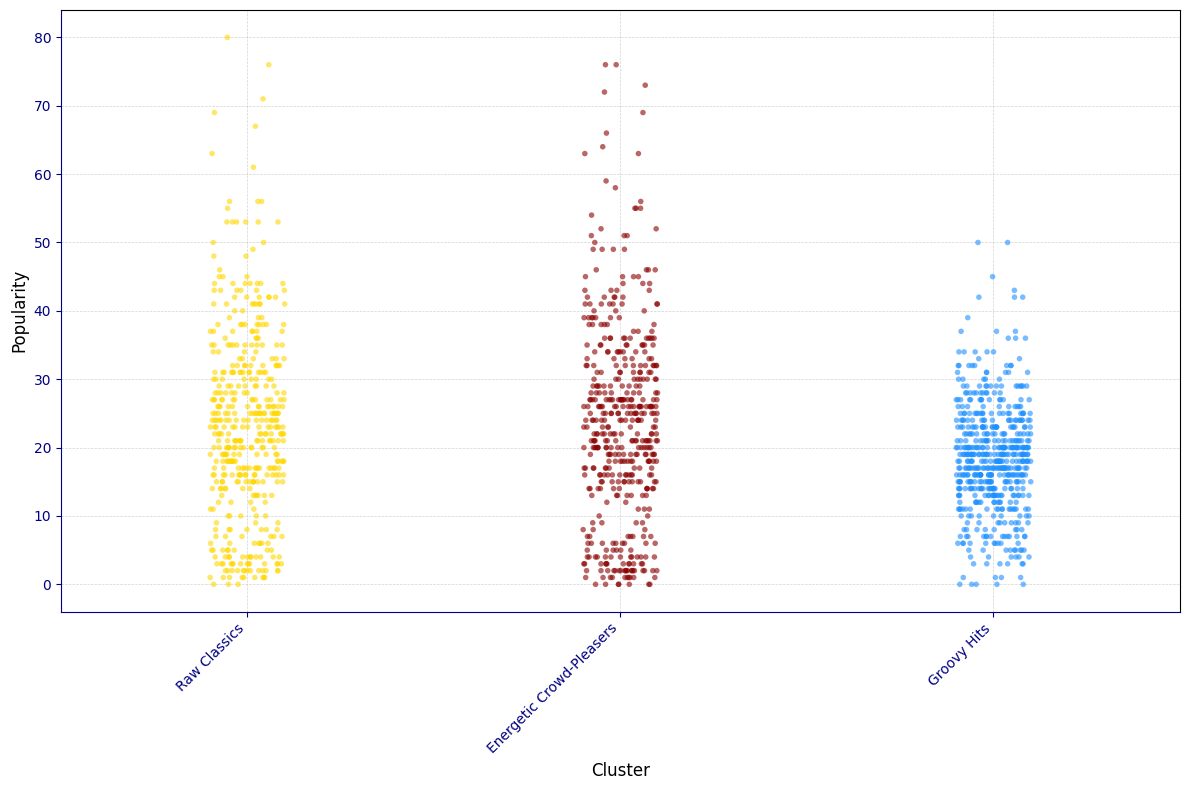

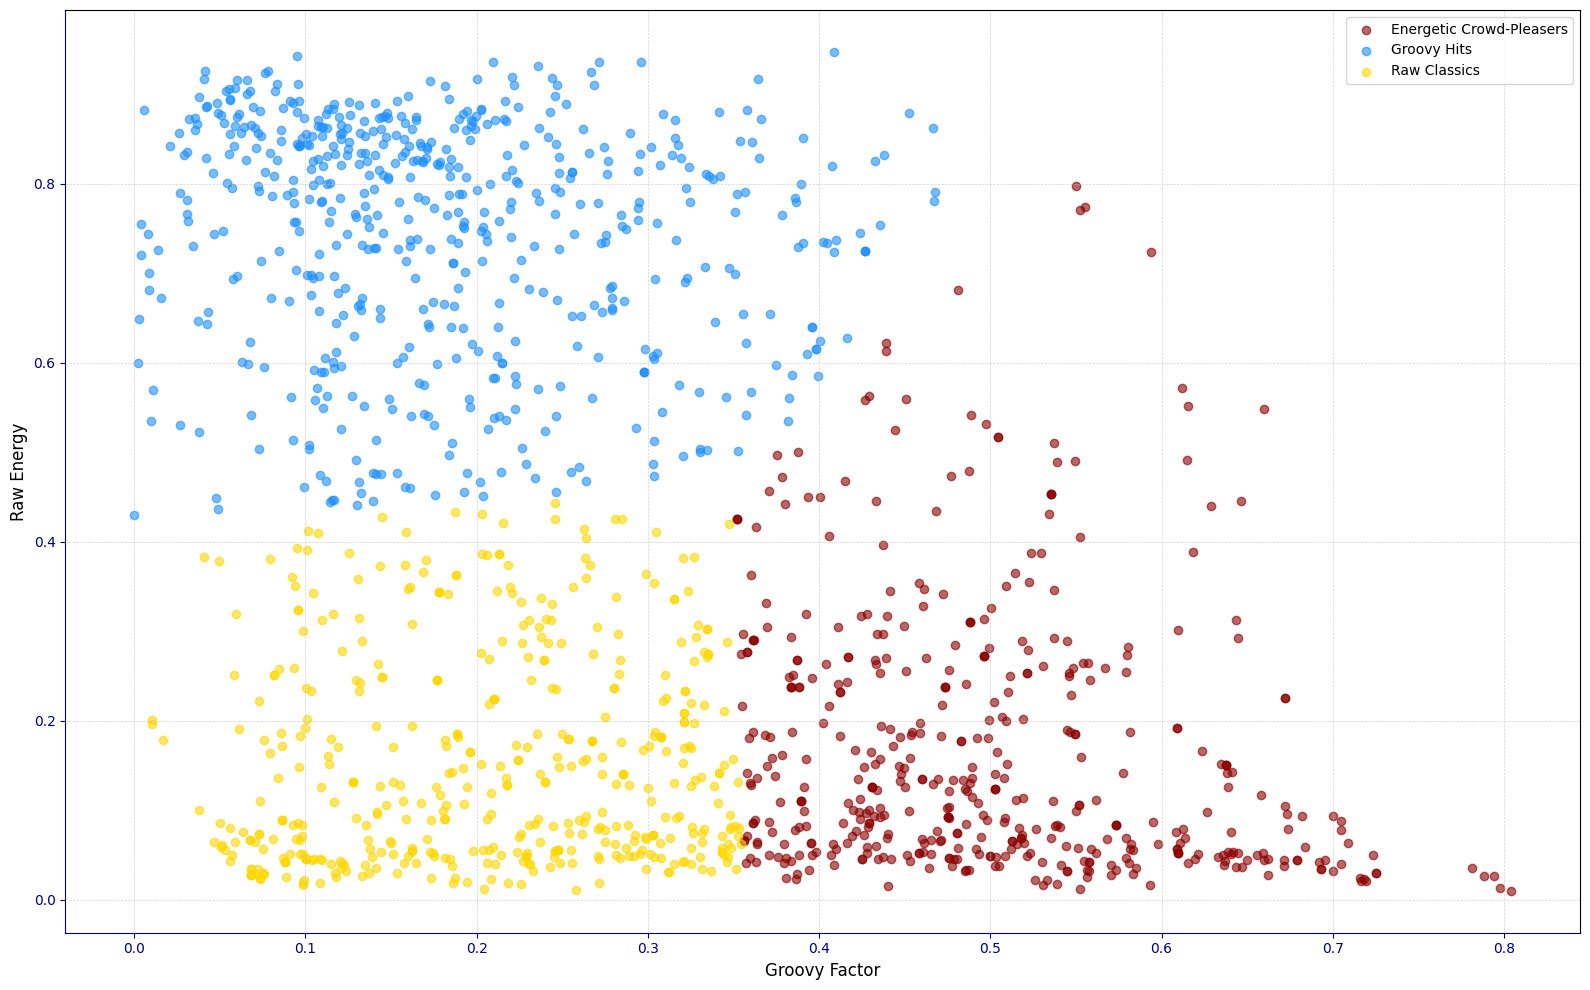


Representative songs for Energetic Crowd-Pleasers:


,name,album,groovy_factor,raw_energy,popularity
203,Cherry Oh Baby - Remastered,Black And Blue (Remastered 2009),0.804105,0.010121,34
779,Cherry Oh Baby,Black And Blue,0.797364,0.013245,20
225,I'm A King Bee,The Rolling Stones,0.793856,0.026167,33
913,I'm A King Bee,England’s Newest Hitmakers,0.788543,0.026584,18
1504,I'm A King Bee,England's Newest Hit Makers,0.781456,0.035635,0



Representative songs for Groovy Hits:


,name,album,groovy_factor,raw_energy,popularity
1108,Outro - Star Spangled Banner - Live / Remaster...,Still Life,0.005646,0.882472,15
636,Street Fighting Man - Live Licks Tour - 2009 R...,Live Licks,0.041296,0.925738,22
1340,"Street Fighting Man - Live At Twickenham, Engl...",Live Licks,0.040828,0.916435,6
937,Respectable - Live,Some Girls: Live In Texas '78,0.037909,0.896618,18
1058,(I Can't Get No) Satisfaction - Live,A Bigger Bang (Live),0.032144,0.872459,16



Representative songs for Raw Classics:


,name,album,groovy_factor,raw_energy,popularity
141,Thru and Thru - Remastered,Voodoo Lounge (Remastered 2009),0.073726,0.022883,38
234,Wild Horses - 2009 Mix,Sticky Fingers (Deluxe),0.068256,0.027324,32
8,Wild Horses - 2009 Mix,Sticky Fingers (Remastered),0.068256,0.027324,69
366,Wild Horses - 2009 Mix,Sticky Fingers (Super Deluxe),0.068256,0.027324,28
255,Wild Horses - 2009 Mix,Honk (Deluxe),0.073515,0.024117,32


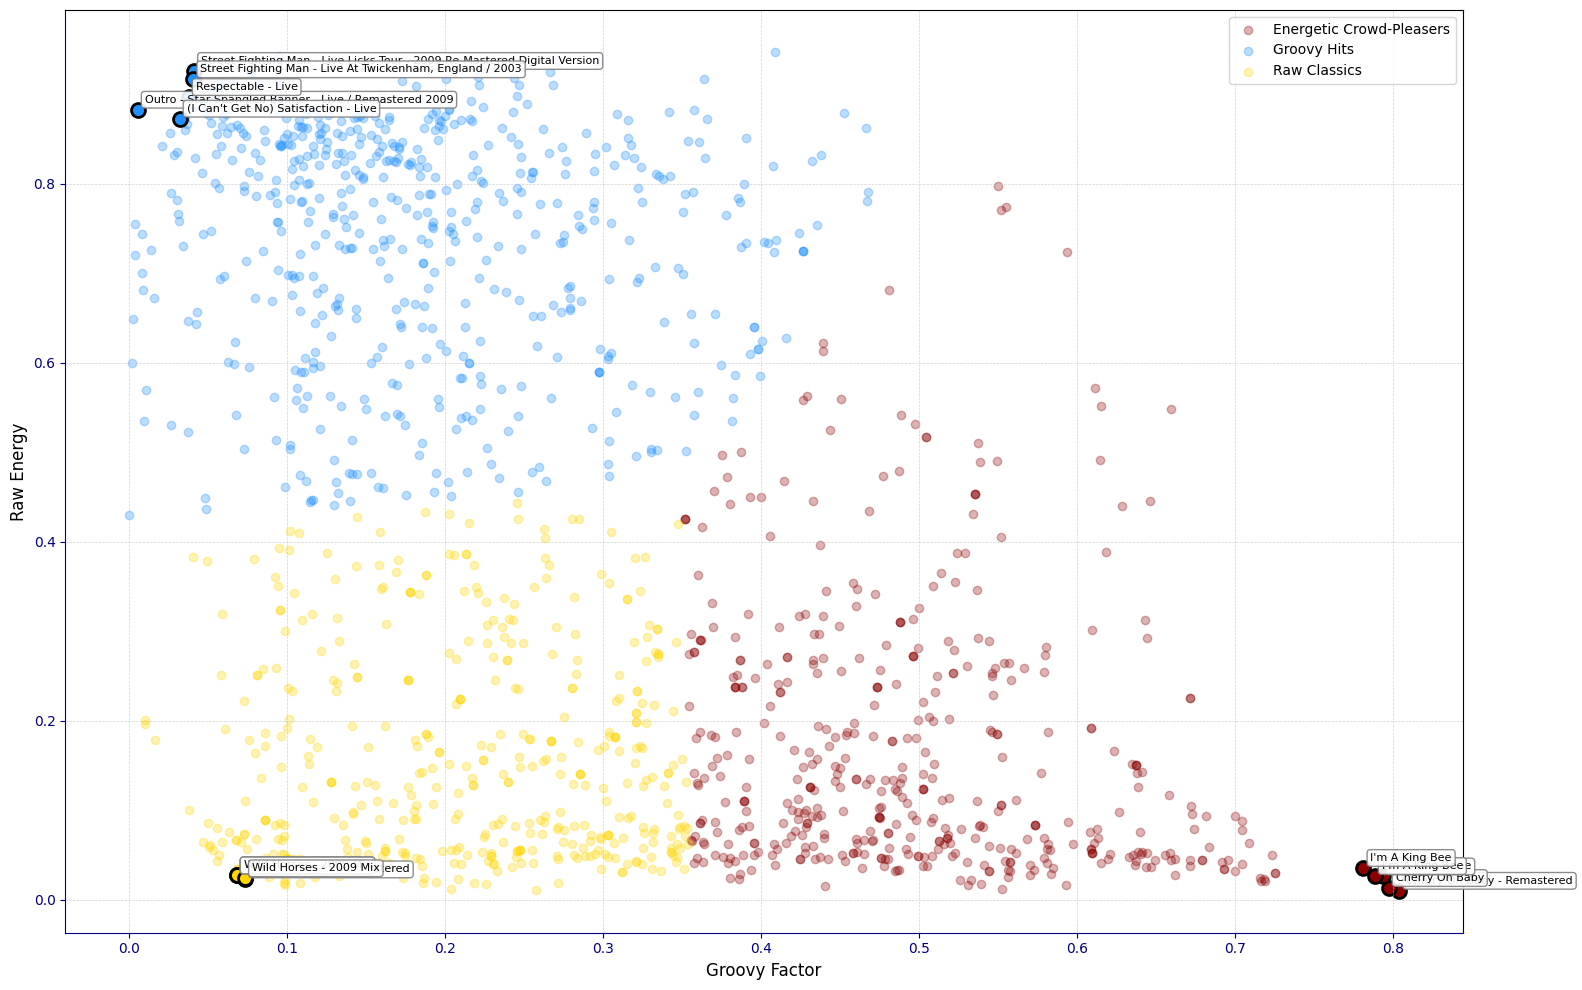


Correlation between cluster and popularity: -0.0094


In [4]:
# Popularity Analysis using a strip plot
fig, ax = plt.subplots(figsize=FIGURE_SIZES['medium'])

sns.stripplot(x='cluster_name', y='popularity', data=stones_tracks_enriched, ax=ax, palette=color_map, 
              jitter=True, size=4, alpha=0.6)

ax.set_title('Distribution of Popularity by Cluster', fontsize=16)
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Popularity', fontsize=12)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

apply_stones_style(fig, ax, '')
plt.tight_layout()
plt.show()

# Groovy Factor vs Raw Energy scatter plot
fig, ax = plt.subplots(figsize=FIGURE_SIZES['large'])

for cluster, name in cluster_names.items():
    cluster_data = stones_tracks_enriched[stones_tracks_enriched['cluster'] == cluster]
    ax.scatter(cluster_data['groovy_factor'], cluster_data['raw_energy'], 
               c=color_map[name], alpha=0.6, label=name)

ax.set_xlabel('Groovy Factor', fontsize=12)
ax.set_ylabel('Raw Energy', fontsize=12)
ax.set_title('Groovy Factor vs Raw Energy by Cluster', fontsize=16)
ax.legend()

apply_stones_style(fig, ax, '')
plt.tight_layout()
plt.show()

# Identify Representative Songs and visualize them
def find_representative_songs(cluster_data, cluster_center, n=5):
    distances = np.linalg.norm(cluster_data[['groovy_factor', 'raw_energy']] - cluster_center, axis=1)
    return cluster_data.iloc[distances.argsort()[:n]]

fig, ax = plt.subplots(figsize=FIGURE_SIZES['large'])

for cluster, name in cluster_names.items():
    cluster_data = stones_tracks_enriched[stones_tracks_enriched['cluster'] == cluster]
    cluster_center = kmeans.cluster_centers_[cluster]
    rep_songs = find_representative_songs(cluster_data, cluster_center)
    
    ax.scatter(cluster_data['groovy_factor'], cluster_data['raw_energy'], 
               c=color_map[name], alpha=0.3, label=name)
    ax.scatter(rep_songs['groovy_factor'], rep_songs['raw_energy'], 
               c=color_map[name], s=100, edgecolor='black', linewidth=2)
    
    for _, song in rep_songs.iterrows():
        ax.annotate(song['name'], (song['groovy_factor'], song['raw_energy']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8,
                    bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))
    
    print(f"\nRepresentative songs for {name}:")
    display(rep_songs[['name', 'album', 'groovy_factor', 'raw_energy', 'popularity']])

ax.set_xlabel('Groovy Factor', fontsize=12)
ax.set_ylabel('Raw Energy', fontsize=12)
ax.set_title('Representative Songs in Each Cluster', fontsize=16)
ax.legend()

apply_stones_style(fig, ax, '')
plt.tight_layout()
plt.show()

# Calculate correlation between cluster and popularity
correlation = stones_tracks_enriched['cluster'].corr(stones_tracks_enriched['popularity'])
print(f"\nCorrelation between cluster and popularity: {correlation:.4f}")

# 🎸 Rolling Stones on Spotify: The Final Encore

## Clustering Analysis Summary: The Rolling Stones' Spotify Catalog

Our K-means clustering analysis of the Rolling Stones' Spotify catalog revealed three distinct clusters, each representing different facets of the band's musical style:

1. **Energetic Crowd-Pleasers** ⚡: 
   - High raw energy, moderate groovy factor
   - Characteristics: Likely high-energy, live-sounding tracks
   - Temporal distribution: Spans various eras, slight concentration in earlier years

2. **Groovy Hits** 🕺: 
   - High groovy factor, moderate raw energy
   - Characteristics: More danceable, potentially mainstream-friendly tracks
   - Temporal distribution: Tends to be more prevalent in later years

3. **Raw Classics** 🎶: 
   - Lower groovy factor and raw energy
   - Characteristics: Possibly represents more stripped-down, bluesy, or experimental tracks
   - Temporal distribution: Distributed across all eras

Key Observations:
- The "Groovy Hits" cluster showed the highest average popularity, suggesting these tracks resonate well with Spotify listeners.
- We observed a slight trend in release years across clusters, with "Groovy Hits" being more common in recent years.
- The clusters show distinct characteristics in terms of "groovy factor" and "raw energy", validating our feature engineering approach.

## Reflection on the Learning Journey

As a student of AI and Machine Learning, this project has been an invaluable learning experience. The journey from initial data cleaning to final analysis has revealed the complexities and challenges of real-world data science projects. The insights I've gained reflect not just the outcomes of our analysis, but also the critical lessons learned along the way, showcasing the iterative and often non-linear nature of data science work.

### Data Quality Issues: Lessons from the Rolling Stones Analysis

As we conclude our analysis of the Rolling Stones' Spotify catalog, it's crucial to address some significant data quality issues that I have identified. These issues highlight important lessons in the data science process:

1. **Initial Data Cleaning Oversight** 🧹:
   - In the initial data cleaning process, I identified and addressed duplicate rows based on exact matches.
   - However, I overlooked:
     - Variations in song names and albums that could represent the same track.
     - Multiple versions of the same song (e.g., live, remastered, or from compilation albums).

2. **Dataset Generation and Utilization** 💽:
   - During initial data cleaning, I generated several datasets (Full Tracks, Clustering Tracks, Outliers, Erroneous Entries, Flagged Tracks).
   - As the project progressed, we primarily used the Full Tracks dataset and created a new stones_tracks_enriched.csv for clustering analysis.
   - The intention to use these datasets for different aspects of our analysis wasn't fully realized due to time constraints and evolving project focus.

3. **Impact on Our Analysis** 🎯:
   - The presence of song variations may have led to artificial inflation of certain clusters or creation of clusters based on production differences rather than true stylistic differences.
   - Our "groovy factor" and "raw energy" features may be capturing production differences rather than intentional stylistic choices.
   - Popularity scores of songs may be diluted or skewed due to the presence of multiple versions of the same track.
   - Observations about trends over time may be affected by the inclusion of remastered or re-released tracks alongside original releases.

### Putting Our Clustering Results in Context

As I interpreted the clustering results, it's important to reflect on the journey that brought us here. My initial approach, while yielding interesting patterns, was based on assumptions and methodologies that I now recognize as having limitations. This realization is a crucial part of the learning process in data science.

The clusters I identified provide valuable insights, but they also serve as a launching point for further questions and investigations. They demonstrate not only what we've learned about the Rolling Stones' music, but also about the complexities of data analysis itself.

### Lessons Learned and Future Improvements 🚀

1. **Thorough Data Exploration**: Spend more time on initial data exploration, looking beyond exact duplicates to identify song variations and potential data quality issues.

2. **Utilize All Generated Datasets**: Incorporate analyses of outliers, erroneous entries, and flagged tracks to gain a more comprehensive understanding of the data.

3. **Version Control for Songs**: Develop a method to identify and group different versions of the same song, allowing for more nuanced analysis.

4. **Metadata Utilization**: Leverage additional metadata (e.g., original release dates, version information) to distinguish between original recordings and later releases.

5. **Iterative Data Cleaning**: Implement a more iterative approach to data cleaning, revisiting and refining the process as insights are gained throughout the analysis.

## Final Thoughts

This project has been a journey of discovery, not just about the Rolling Stones' music, but about the intricacies of data science itself. While my analysis has provided interesting insights into the band's musical evolution as represented on Spotify, it has also highlighted the challenges and complexities of working with real-world data.

The clusters we've identified, while offering a new perspective on the Stones' catalog, should be viewed as a starting point for further investigation rather than definitive groupings. They serve as a testament to the power of data analysis in uncovering patterns, but also as a reminder of the importance of critical thinking and continuous questioning in data science.

As I conclude this project, I recognize that every step - from data cleaning to feature engineering to clustering - has been a learning opportunity. The insights gained, both about the Rolling Stones' music and about the data science process itself, provide a foundation for future analyses and a deeper appreciation of the complexities involved in turning data into meaningful insights.

In the spirit of the Rolling Stones themselves, who have continually evolved and refined their craft over decades, I too must approach AI and Machine Learning as an ongoing journey of learning, adaptation, and improvement. 🎵📊🤘